In [5]:
#all imports go here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
import scipy
from scipy import stats
#from bioinfokit.analys import stat
#from statsmodels.graphics.factorplots import interaction_plot
#res=stat()
pd.set_option("display.max_rows",None)

In [6]:
#develop fake data
random.seed(50)
N = 50
a = [random.gauss(55,20) for x in range(N)]
b = [random.gauss(50,15) for x in range(N)]

Text(0.5, 1.0, 'Two-Sample T-test')

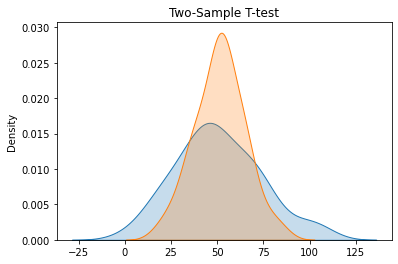

In [7]:
#visualizing
sns.kdeplot(a, shade=True)
sns.kdeplot(b, shade=True)
plt.title("Two-Sample T-test")

In [8]:
#2 sample t test or independent sample 
tStat, pValue = stats.ttest_ind(a, b, equal_var=False)
print("P-Value:{0} T-Statistic:{1}".format(pValue,tStat))

P-Value:0.8521303420279133 T-Statistic:-0.18700897982039738


In [9]:
#1 sample t-test fake data
N = 30
a = [random.gauss(50,15) for x in range(N)]
popmean = 50.05

In [10]:
#1 sample t-test
tStat, pValue = scipy.stats.ttest_1samp(a, popmean, axis=0)
print("P-Value:{0} T-Statistic:{1}".format(pValue,tStat))

P-Value:0.40763145106167975 T-Statistic:0.840270325124658


In [11]:
#fake data for paired t test / related or repeated measures 
N = 30
a = [random.gauss(60,15) for x in range(N)]
b = [random.gauss(60,15) for x in range(N)]

In [12]:
tStat, pValue = scipy.stats.ttest_rel(a, b, axis=0)
print("P-Value:{0} T-Statistic:{1}".format(pValue,tStat))

P-Value:0.9563562606069607 T-Statistic:0.055201793284441816


In [13]:
datafile = "/Users/shionguha/Documents/GitHub/inf2178h-w22-exp-design-datascience/data/PlantGrowth.csv"

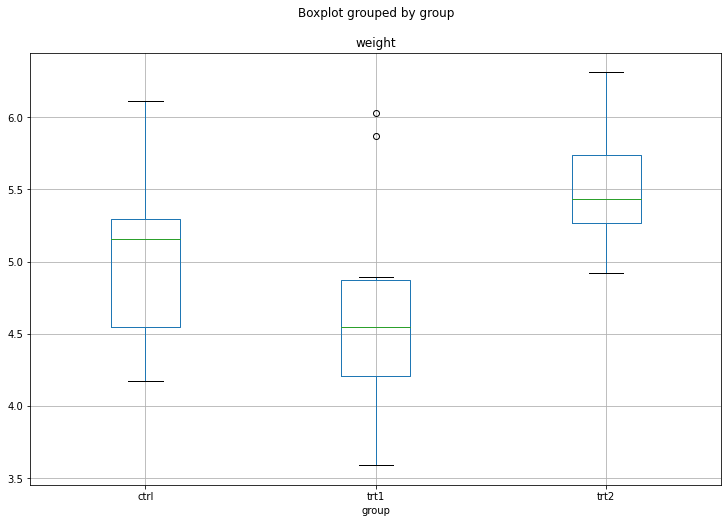

In [14]:
data = pd.read_csv(datafile)

#create boxplot
data.boxplot('weight', by='group',figsize=(12,8))

ctrl = data['weight'][data.group == 'ctrl']

grps = pd.unique(data.group.values)
d_data = {grp:data['weight'][data.group == grp] for grp in grps}

k = len(pd.unique(data.group))
N = len(data.values)
n = data.groupby('group').size()[0]

In [15]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

mod = ols('weight ~ group', data=data).fit()

aov_table = sm.stats.anova_lm(mod, typ=2)
print(aov_table)

            sum_sq    df         F   PR(>F)
group      3.76634   2.0  4.846088  0.01591
Residual  10.49209  27.0       NaN      NaN


In [16]:
#post hoc tests: tukey hsd
#tukey hsd with bonferroni's correction
pair_t = mod.t_test_pairwise('group')
pair_t.result_frame

,coef,std err,t,P>|t|,Conf. Int. Low,Conf. Int. Upp.,pvalue-hs,reject-hs
trt1-ctrl,-0.371,0.278782,-1.330791,0.194388,-0.943013,0.201013,0.194388,False
trt2-ctrl,0.494,0.278782,1.771996,0.087682,-0.078013,1.066013,0.167675,False
trt2-trt1,0.865,0.278782,3.102787,0.004459,0.292987,1.437013,0.013318,True


In [17]:
import pingouin as pg

aov = pg.anova(data=data, dv='weight',between='group',detailed=True)

In [18]:
print(aov)

   Source        SS  DF        MS         F    p-unc       np2
0   group   3.76634   2  1.883170  4.846088  0.01591  0.264148
1  Within  10.49209  27  0.388596       NaN      NaN       NaN


In [19]:
#post hoc test with pingouin
#cohen = effect size
pt = pg.pairwise_tukey(dv='weight',between='group',effsize='cohen',data=data)
print(pt)

      A     B  mean(A)  mean(B)   diff        se         T   p-tukey     cohen
0  ctrl  trt1    5.032    4.661  0.371  0.278782  1.330791  0.390871  0.595148
1  ctrl  trt2    5.032    5.526 -0.494  0.278782 -1.771996  0.197996 -0.792461
2  trt1  trt2    4.661    5.526 -0.865  0.278782 -3.102787  0.012006 -1.387609


In [20]:
#ANOVA = systematic variance / unsystematic variance
#OR
#ANOVA = comparing proportion of variance explained between levels of cateogorical variables
#proportion of variance  = sum of squares
#SS_T = total sum of squares
#SS_T = SS_between + SS_within
#SS_between = SS_T - SS_within

In [21]:
#anything beyond a 1 way anova is called a factorial anova
#don't go beyond a 2 way anova.
#bias-variance tradeoff

d = pd.read_csv("/Users/shionguha/Documents/GitHub/inf2178h-w22-exp-design-datascience/data/twowayanova.txt", sep="\t")

d.head()

,Genotype,1_year,2_year,3_year
0,A,1.53,4.08,6.69
1,A,1.83,3.84,5.97
2,A,1.38,3.96,6.33
3,B,3.60,5.70,8.55
4,B,2.94,5.07,7.95


In [22]:
d_melt = pd.melt(d, id_vars=['Genotype'], value_vars=['1_year','2_year','3_year'])

d_melt.columns = ['Genotype', 'years', 'value']

d_melt.head()

,Genotype,years,value
0,A,1_year,1.53
1,A,1_year,1.83
2,A,1_year,1.38
3,B,1_year,3.60
4,B,1_year,2.94


<AxesSubplot:xlabel='Genotype', ylabel='value'>

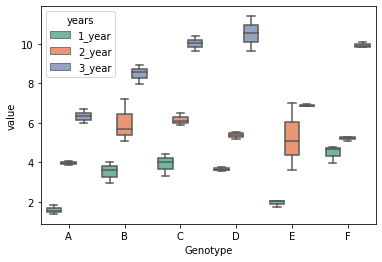

In [23]:
#exploratory data analysis
sns.boxplot(x="Genotype", y="value", hue="years", data=d_melt, palette="Set2")

In [24]:
#doing 2 way anovas with statsmodels
model = ols('value ~ C(Genotype) + C(years) + C(Genotype):C(years)', data=d_melt).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
C(Genotype),58.551733,5.0,32.748581,1.931655e-12
C(years),278.925633,2.0,390.014868,4.006243e-25
C(Genotype):C(years),17.122967,10.0,4.788525,2.230094e-04
Residual,12.873000,36.0,NaN,NaN


In [26]:
#bioinfokit
#res = stat()
#res.anova_stat(df=d_melt, res_var='value', anova_model='value ~ C(Genotype) + C(years) + C(Genotype):C(years)')
#res.anova_summary

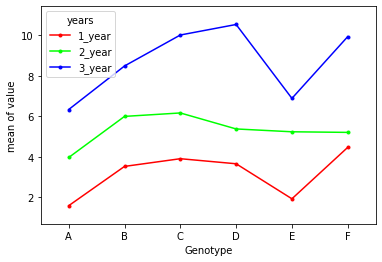

In [27]:
#interaction plot
fig = interaction_plot(x=d_melt['Genotype'], trace=d_melt['years'], response=d_melt['value'])

plt.show()

In [30]:
#res=stat()
#res.tukey_hsd(df=d_melt, res_var='value', xfac_var='Genotype',anova_model='value ~ C(Genotype) + C(years) + C(Genotype):C(years)')
#res.tukey_summary

In [31]:
#res=stat()
#res.tukey_hsd(df=d_melt, res_var='value', xfac_var='years',anova_model='value ~ C(Genotype) + C(years) + C(Genotype):C(years)')
#res.tukey_summary

In [32]:
#res=stat()
#res.tukey_hsd(df=d_melt, res_var='value', xfac_var=['Genotype','years'],anova_model='value ~ C(Genotype) + C(years) + C(Genotype):C(years)')
#res.tukey_summary

In [33]:
#simple and multiple linear regressions
dataset = pd.read_csv("/Users/shionguha/Documents/GitHub/inf2178h-w22-exp-design-datascience/data/student_scores.csv")

In [34]:
dataset.shape

(25, 2)

In [35]:
dataset.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [36]:
dataset.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


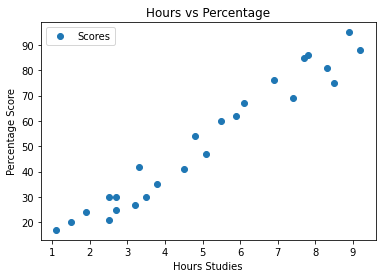

In [38]:
#plotting
dataset.plot(x='Hours', y='Scores', style='o')
plt.title('Hours vs Percentage')
plt.xlabel('Hours Studies')
plt.ylabel('Percentage Score')
plt.show()

In [40]:
#building regression
X = dataset.iloc[:,:-1].values
y = dataset.iloc[:,1].values

In [41]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=0)

In [42]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [43]:
print(regressor.intercept_)

2.018160041434662


In [44]:
print(regressor.coef_)

[9.91065648]


In [45]:
#making predictions
y_pred = regressor.predict(X_test)

In [46]:
df = pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})
df

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [47]:
from sklearn import metrics
print('MAE:',metrics.mean_absolute_error(y_test,y_pred))
print('MSE:', metrics.mean_squared_error(y_test,y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

MAE: 4.183859899002982
MSE: 21.598769307217456
RMSE: 4.647447612100373


In [48]:
#MLR
dataset = pd.read_csv('/Users/shionguha/Documents/GitHub/inf2178h-w22-exp-design-datascience/data/petrol_consumption.csv')

In [49]:
dataset.head()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
0,9.0,3571,1976,0.525,541
1,9.0,4092,1250,0.572,524
2,9.0,3865,1586,0.580,561
3,7.5,4870,2351,0.529,414
4,8.0,4399,431,0.544,410


In [50]:
dataset.describe()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
count,48.000000,48.000000,48.000000,48.000000,48.000000
mean,7.668333,4241.833333,5565.416667,0.570333,576.770833
std,0.950770,573.623768,3491.507166,0.055470,111.885816
min,5.000000,3063.000000,431.000000,0.451000,344.000000
25%,7.000000,3739.000000,3110.250000,0.529750,509.500000
50%,7.500000,4298.000000,4735.500000,0.564500,568.500000
75%,8.125000,4578.750000,7156.000000,0.595250,632.750000
max,10.000000,5342.000000,17782.000000,0.724000,968.000000


In [52]:
X = dataset[['Petrol_tax', 'Average_income', 'Paved_Highways', 'Population_Driver_licence(%)']]
y = dataset['Petrol_Consumption']

In [53]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=0)

In [54]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [56]:
coeff_df = pd.DataFrame(regressor.coef_,X.columns, columns=['Coefficient'])
coeff_df

,Coefficient
Petrol_tax,-40.016660
Average_income,-0.065413
Paved_Highways,-0.004741
Population_Driver_licence(%),1341.862121


In [57]:
y_pred = regressor.predict(X_test)

In [58]:
df = pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})
df

,Actual,Predicted
29,534,469.391989
4,410,545.645464
26,577,589.668394
30,571,569.730413
32,577,649.774809
37,704,646.631164
34,487,511.608148
40,587,672.475177
7,467,502.074782
10,580,501.270734


In [59]:
from sklearn import metrics
print('MAE:',metrics.mean_absolute_error(y_test,y_pred))
print('MSE:', metrics.mean_squared_error(y_test,y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

MAE: 56.8222474789647
MSE: 4666.344787588362
RMSE: 68.31064915215168


In [60]:
#ANCOVA example
df = pd.read_csv("/Users/shionguha/Documents/GitHub/inf2178h-w22-exp-design-datascience/data/ancova_data.csv")
df.head(5)

,genotype,height,yield
0,A,10.0,20.0
1,A,11.5,22.0
2,A,12.0,24.0
3,A,12.9,24.0
4,A,13.4,26.0


In [61]:
from dfply import *

In [62]:
df >> group_by(X.genotype) >> summarize(n=X['yield'].count(), mean =X['yield'].mean(), std =X['yield'].std())

,genotype,n,mean,std
0,A,10,25.17,2.577704
1,B,10,35.45,2.431849
2,C,10,17.73,2.039635


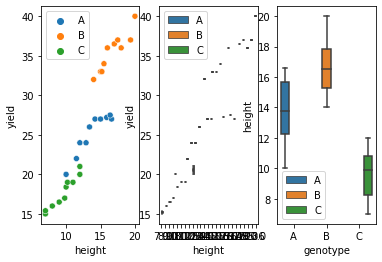

In [64]:
import seaborn as sns
import matplotlib.pyplot as plt
fig, axs = plt.subplots(ncols=3)
sns.scatterplot(data=df,x="height",y="yield",hue=df.genotype.tolist(), ax=axs[0])
sns.boxplot(data=df,x="height",y="yield",hue=df.genotype.tolist(), ax=axs[1])
sns.boxplot(data=df,x="genotype",y="height",hue=df.genotype.tolist(), ax=axs[2])
plt.show()

In [65]:
#building ancova model
from pingouin import ancova
ancova(data=df,dv='yield',covar='height',between='genotype')

,Source,SS,DF,F,p-unc,np2
0,genotype,193.232458,2,141.352709,1.072947e-14,0.915777
1,height,132.695696,1,194.138152,1.429323e-13,0.881892
2,Residual,17.771304,26,NaN,NaN,NaN


In [66]:
#next step: pingouin -> ancova library -> adjusted means

In [73]:
#testing assumptions of GLMs
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
from bioinfokit.analys import stat
df = pd.read_csv("/Users/shionguha/Documents/GitHub/inf2178h-w22-exp-design-datascience/data/onewayanova.txt", sep="\t")
df.head()

,A,B,C,D
0,25,45,30,54
1,30,55,29,60
2,28,29,33,51
3,36,56,37,62
4,29,40,27,73


In [74]:
df_melt = pd.melt(df.reset_index(), id_vars=['index'], value_vars=['A', 'B', 'C', 'D'])

In [75]:
df_melt.columns = ['index', 'treatments', 'value']

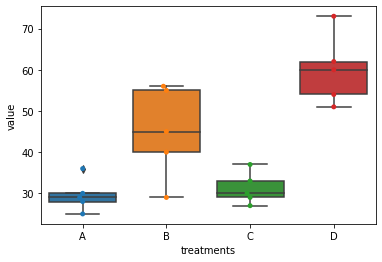

In [76]:
#viz
ax = sns.boxplot(x='treatments', y='value',data=df_melt)
ax = sns.swarmplot(x='treatments', y='value',data=df_melt)
plt.show()

In [77]:
#ols
model = ols('value ~ C(treatments)', data=df_melt).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
C(treatments),3010.95,3.0,17.49281,0.000026
Residual,918.00,16.0,NaN,NaN


In [78]:
#anova
res = stat()
res.anova_stat(df=df_melt,res_var='value',anova_model='value ~ C(treatments)')
res.anova_summary    

,df,sum_sq,mean_sq,F,PR(>F)
C(treatments),3.0,3010.95,1003.650,17.49281,0.000026
Residual,16.0,918.00,57.375,NaN,NaN


In [79]:
#tukey hsd
res = stat()
res.tukey_hsd(df=df_melt, res_var='value', xfac_var='treatments', anova_model='value ~ C(treatments)')
res.tukey_summary

/Users/shionguha/opt/miniconda3/lib/python3.9/site-packages/bioinfokit/analys.py:402: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  mult_group[ele] = df[df[xfac_var] == ele].mean().loc[res_var]


,group1,group2,Diff,Lower,Upper,q-value,p-value
0,A,B,15.4,1.692871,29.107129,4.546156,0.025070
1,A,C,1.6,-12.107129,15.307129,0.472328,0.900000
2,A,D,30.4,16.692871,44.107129,8.974231,0.001000
3,B,C,13.8,0.092871,27.507129,4.073828,0.048178
4,B,D,15.0,1.292871,28.707129,4.428074,0.029578
5,C,D,28.8,15.092871,42.507129,8.501903,0.001000


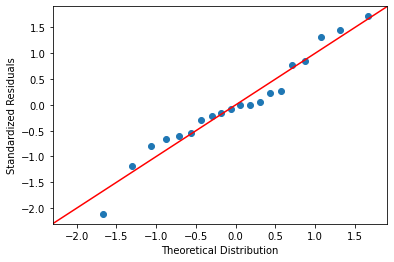

In [81]:
#testing for normality
sm.qqplot(res.anova_std_residuals,line='45')
plt.xlabel("Theoretical Distribution")
plt.ylabel("Standardized Residuals")
plt.show()

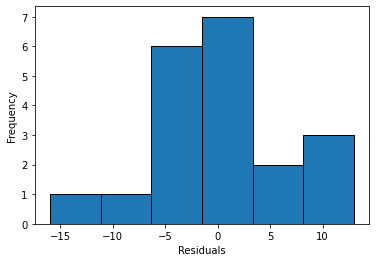

In [82]:
plt.hist(res.anova_model_out.resid, bins='auto', histtype='bar', ec='k')
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()

In [83]:
#kolmogorov-smirnov, anderson-darling, wilks-shapiro etc
w, pvalue = stats.shapiro(model.resid)
print(w,pvalue)

0.9685019850730896 0.7229772806167603


In [84]:
#levene's test for constancy of variance
res = stat()
res.levene(df=df_melt,res_var='value',xfac_var='treatments')
res.levene_summary

,Parameter,Value
0,Test statistics (W),1.9220
1,Degrees of freedom (Df),3.0000
2,p value,0.1667
